In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import datetime

import gym
import trading_env

import os
import agent 
from os import __file__

In [2]:
#env = gym.make('trading-v0')
env_trading = gym.make('test_trading-v0')

Loading historical data file


Holder Agent
--------------
To begin a holder agent will run on the month of march 2017, which will provide a reference to compare future agents. The same could also be done with a random agent. A holder agent is equivalent to set the action to 1 at each step (selling 100% of the portfolio's fiat).

In [3]:
date = datetime.datetime(2017, 5, 1, 0, 0)
env_trading.reset(date=date)
rewards = []
portfolio = []
while True:
    action = np.array([1]) #Holding
    s, r, done, _ = env_trading.step(action)
    rewards.append(r)
    portfolio.append(env_trading.portfolio_value)
    if done:
        break

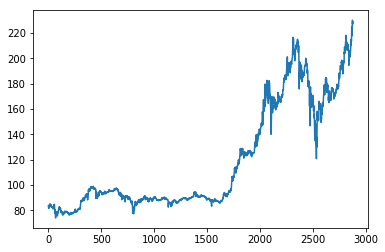

In [4]:
plt.plot(portfolio)
plt.show()

Stochastic Policy Gradient
-----------

In [5]:
agent = agent.StochasticPolicyGradientAgent(env_trading) #Do not run this twice without reseting the Kernel!

In [6]:
#As a sanity check I try to overfit over the same step

date = datetime.datetime(2017, 5, 1, 0, 0)
rewards = []
env_trading.start_fiat = 100
env_trading.start_crypto = 1

for i in range(100):
    start = env_trading.reset(date=date)
    action = agent.act([start])
    s, r, done, _ = env_trading.step([1])
    agent.store_step(action, s, r)
    rewards.append(r)
    agent.train()


Sigma: 1.3111498355865479, Mu: [[-0.96656173]], Action: [[-1.]]
[[ 0.]]


/home/guilherme/Documentos/IA/ml-stock-prediction/agent/continuous_agent.py:81: RuntimeWarning: invalid value encountered in true_divide
  norm_rewards /= np.std(rewards)


Sigma: 1.3111498355865479, Mu: [[-0.96656173]], Action: [[-1.]]
[[ 0.]]
Sigma: 1.3111498355865479, Mu: [[-0.96656173]], Action: [[-1.]]
[[ 0.]]
Sigma: 1.3111498355865479, Mu: [[-0.96656173]], Action: [[-0.68058808]]
[[ 0.00535019]]
Sigma: 1.2869946956634521, Mu: [[-0.9895575]], Action: [[-1.]]
[[ 0.]]
Sigma: 1.2669256925582886, Mu: [[-0.99369609]], Action: [[-1.]]
[[ 0.]]
Sigma: 1.2498799562454224, Mu: [[-0.99613768]], Action: [[ 0.95853526]]
[[ 0.06950869]]
Sigma: 1.2688112258911133, Mu: [[-0.99553466]], Action: [[-0.89450973]]
[[ 0.00165719]]
Sigma: 1.2850401401519775, Mu: [[-0.99492288]], Action: [[-1.]]
[[ 0.]]
Sigma: 1.2996208667755127, Mu: [[-0.99269521]], Action: [[-0.9420966]]
[[ 0.00092679]]
Sigma: 1.3123923540115356, Mu: [[-0.99198014]], Action: [[ 1.]]
[[ 0.0696212]]
Sigma: 1.3345807790756226, Mu: [[-0.98633474]], Action: [[-1.]]
[[ 0.]]
Sigma: 1.354851245880127, Mu: [[-0.95654351]], Action: [[-0.60905872]]
[[ 0.00647722]]
Sigma: 1.3713120222091675, Mu: [[-0.9225384]], Actio

KeyboardInterrupt: 

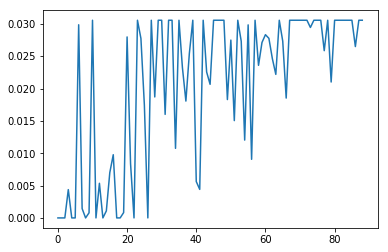

In [7]:
plt.plot(rewards)
plt.show()

In [8]:
for i in range(100):
    start = env_trading.reset(date=date)
    s, r, done, _ = env_trading.step([1])
    print(r)

0.0305493964031
0.0305493964031
0.0305493964031
0.0305493964031
0.0305493964031
0.0305493964031
0.0305493964031
0.0305493964031
0.0305493964031
0.0305493964031
0.0305493964031


KeyboardInterrupt: 